### ML ASSIGNMENT 3
### Name: Prabhat Dwivedi
### Roll No: 2018IMT-067
### Course: Machine Learning Lab
### Course Code: ITIT - 4107
### Deadline : 02 October 2021

a) Implementing Linear Regression

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt

Generating 50 random data points and adding noise to y

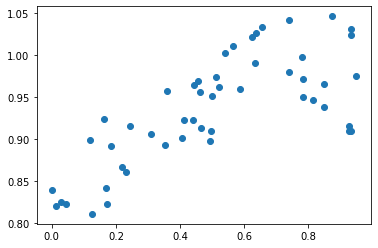

In [11]:
input=np.random.random((50,1))
noiseless=np.sin(1+np.square(input))
noise=np.random.normal(0,0.032,size=(50,1))
noisefull=noiseless+noise
train=40
plt.scatter(input, noisefull)
plt.show()

In [4]:
def normalize(X):
    mu = X.mean(0)
    std = X.std(0)
    return (X - mu) / std, mu, std


def add_bias_column(X):
    ones = np.ones(X.shape[0]).reshape(X.shape[0], 1)
    return np.concatenate((ones, X), 1)


def normal_equation(X, y):
    w = inv(X.T.dot(X)).dot(X.T).dot(y)
    return w


def compute_error(X, y, w):
    return (y - X.dot(w)).T.dot(y - X.dot(w))



----------------------------------------------------------------------
Normal Equation Model:
 [[0.84648047]
 [0.16157032]] 
 ----------------------------------------------------------------------
[0.97731124] [0.80974502]
[0.87190505] [0.15735921]
[0.90356578] [0.35331554]
[0.95005705] [0.64106191]
[0.88666917] [0.24873811]
[0.97949253] [0.82324562]
[0.97951962] [0.82341329]
[0.86115632] [0.09083256]
[0.97826158] [0.81562692]
[0.89462882] [0.29800241]
[0.862023] [0.09619666]
[0.85013454] [0.02261593]
[0.94342277] [0.60000063]
[0.99330815] [0.908754]
[0.94623348] [0.61739687]
[1.00346463] [0.97161504]
[0.85073031] [0.0263033]
[0.84965049] [0.01962001]
[0.94128875] [0.58679262]
[0.91384289] [0.41692323]
[0.9620069] [0.71502258]
[0.93474783] [0.54630922]
[0.86415198] [0.10937344]
[0.91526902] [0.42574991]
[0.87249258] [0.16099556]
[0.94979038] [0.63941141]
[0.9931897] [0.90802087]
[0.99367384] [0.91101734]
[0.89024062] [0.27084273]
[1.00151192] [0.95952922]
[1.0052709] [0.98279455]
[0.91

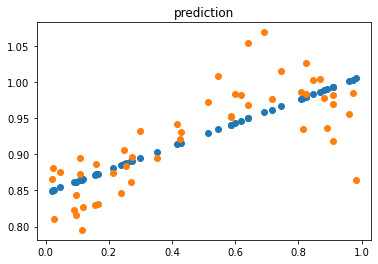

In [6]:
if __name__ == '__main__':

    X = input
    y = noisefull
    X = add_bias_column(X)
    ne_w = normal_equation(X, y)
    print('-' * 70)
    print('Normal Equation Model:\n', ne_w, '\n', '-' * 70)
    predict= ne_w[1] * input + ne_w[0]
    for a,b in zip(predict,input):
        print(a ,b)

    plt.title("prediction")
    plt.scatter(input, predict)
    plt.scatter(input, noisefull)

    plt.show()

b) Implementing Polynomial Regression

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def getPoweredX(deg, X_t):
    X_pow = X_t.copy()
    for i in range(2, deg + 1):
        powmat = (X_t[:, 1] ** i).reshape(X_pow.shape[0], 1)
        X_pow = np.append(X_pow, powmat, axis=1)
    return X_pow


def calculateEmpricalRisk(yh):
    error = sum((Y - yh) ** 2)
    return error / len(Y)

Generating random numbers in range of 50

In [24]:
input=np.random.random((50,1))
noiseless=np.sin(1+np.square(input))
noise=np.random.normal(0,0.032,size=(50,1))
noisefull=noiseless+noise

X = input
X_train = np.append(np.ones((X.shape[0], 1)), X, axis=1)
Y = noiseless

Applying Polynomial Regression for degree 1 and printing its corresponding error and plot

Empirical risk for degree 1 model:  [0.00035485]


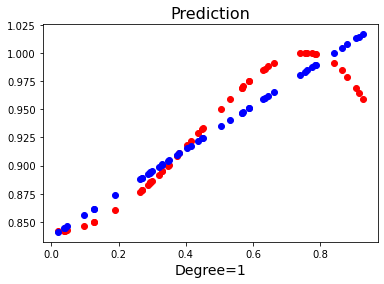

In [25]:
deg1 = 1
X1 = getPoweredX(deg1, X_train)

first_part = np.linalg.inv(np.dot(X1.transpose(), X1))
second_part = np.dot(first_part, X1.transpose())
W1 = np.dot(second_part, Y)

print("Empirical risk for degree 1 model: ", calculateEmpricalRisk(np.dot(X1, W1)))
plt.title("Prediction", size = "16")
plt.xlabel("Degree=1", size = "14")
plt.scatter(X,Y, color = "red")
plt.scatter(X1[:,1], np.dot(X1, W1), color = "blue")
plt.show()

Applying Polynomial Regression for degree 2 and printing its corresponding error and plot

Empirical risk for degree 2 model:  [0.00022797]


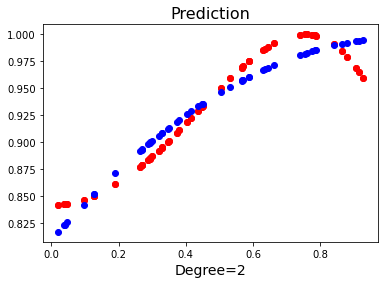

In [27]:
deg2 = 2
X2 = getPoweredX(deg2, X_train)

first_part = np.linalg.pinv(np.dot(X2.transpose(), X2))
second_part = np.dot(first_part, X2.transpose())
W2 = np.dot(second_part, Y)

print("Empirical risk for degree 2 model: ", calculateEmpricalRisk(np.dot(X2, W2)))
plt.title("Prediction", size = "16")
plt.xlabel("Degree=2", size = "14")
plt.scatter(X,Y, color = "red")
plt.scatter(X,Y, color = "red")
plt.scatter(X2[:,1], np.dot(X2, W2), color = "blue")
plt.show()

Applying Polynomial Regression for degree 3 and printing its corresponding error and plot

Empirical risk for degree 3 model:  [3.13268607e-06]


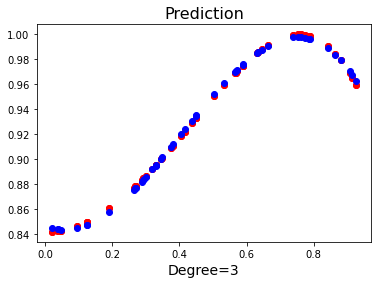

In [29]:
deg3 = 3
X3 = getPoweredX(deg3, X_train)

first_part = np.linalg.pinv(np.dot(X3.transpose(), X3))
second_part = np.dot(first_part, X3.transpose())
W3 = np.dot(second_part, Y)

print("Empirical risk for degree 3 model: ", calculateEmpricalRisk(np.dot(X3, W3)))
plt.title("Prediction", size = "16")
plt.xlabel("Degree=3", size = "14")
plt.scatter(X,Y, color = "red")
plt.scatter(X,Y, color = "red")
plt.scatter(X3[:,1], np.dot(X3, W3), color = "blue")
plt.show()

Applying Polynomial Regression for degree 4 and printing its corresponding error and plot

Empirical risk for degree 4 model:  [1.43185264e-09]


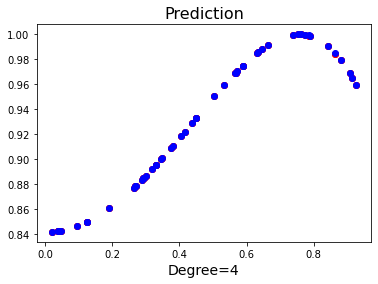

In [30]:
deg4 = 4
X4 = getPoweredX(deg4, X_train)

first_part = np.linalg.pinv(np.dot(X4.transpose(), X4))
second_part = np.dot(first_part, X4.transpose())
W4 = np.dot(second_part, Y)

print("Empirical risk for degree 4 model: ", calculateEmpricalRisk(np.dot(X4, W4)))
plt.title("Prediction", size = "16")
plt.xlabel("Degree=4", size = "14")
plt.scatter(X,Y, color = "red")
plt.scatter(X,Y, color = "red")
plt.scatter(X4[:,1],np.dot(X4,W4), color = "blue")
plt.show()